In [1]:
from google.colab import files
uploaded = files.upload()

Saving UnknownSpectrograms.zip to UnknownSpectrograms.zip
Saving FiretruckSpectrograms.zip to FiretruckSpectrograms.zip


In [2]:
!unzip FiretruckSpectrograms.zip -d /content/FiretruckSpectrograms
!unzip UnknownSpectrograms.zip -d /content/UnknownSpectrograms

Archive:  FiretruckSpectrograms.zip
   creating: /content/FiretruckSpectrograms/Firetruck/
  inflating: /content/FiretruckSpectrograms/Firetruck/sound_271.png  
 extracting: /content/FiretruckSpectrograms/Firetruck/sound_368.png  
  inflating: /content/FiretruckSpectrograms/Firetruck/sound_247.png  
  inflating: /content/FiretruckSpectrograms/Firetruck/sound_236.png  
  inflating: /content/FiretruckSpectrograms/Firetruck/sound_377.png  
  inflating: /content/FiretruckSpectrograms/Firetruck/sound_391.png  
  inflating: /content/FiretruckSpectrograms/Firetruck/sound_275.png  
  inflating: /content/FiretruckSpectrograms/Firetruck/sound_203.png  
  inflating: /content/FiretruckSpectrograms/Firetruck/sound_256.png  
  inflating: /content/FiretruckSpectrograms/Firetruck/sound_300.png  
  inflating: /content/FiretruckSpectrograms/Firetruck/sound_251.png  
  inflating: /content/FiretruckSpectrograms/Firetruck/sound_242.png  
  inflating: /content/FiretruckSpectrograms/Firetruck/sound_323.png  

In [3]:
import os

print("Firetruck Spectrograms:")
print(os.listdir('/content/FiretruckSpectrograms'))

print("Unknown Spectrograms:")
print(os.listdir('/content/UnknownSpectrograms'))

Firetruck Spectrograms:
['Firetruck']
Unknown Spectrograms:
['Unknown']


In [4]:
import shutil

# Create directories for training data
os.makedirs('/content/TrainingData/firetruck', exist_ok=True)
os.makedirs('/content/TrainingData/unknown', exist_ok=True)

# Move firetruck spectrograms to "firetruck" directory
for file_name in os.listdir('/content/FiretruckSpectrograms'):
    if file_name.endswith('.png'):
        shutil.move(os.path.join('/content/FiretruckSpectrograms', file_name),
                    '/content/TrainingData/firetruck/')

# Move unknown spectrograms to "unknown" directory
for file_name in os.listdir('/content/UnknownSpectrograms'):
    if file_name.endswith('.png'):
        shutil.move(os.path.join('/content/UnknownSpectrograms', file_name),
                    '/content/TrainingData/unknown/')

print("Data organized into 'firetruck' and 'unknown' directories.")


Data organized into 'firetruck' and 'unknown' directories.


In [8]:
import os

# Define paths to the directories
firetruck_dir = '/content/FiretruckSpectrograms'
unknown_dir = '/content/UnknownSpectrograms'

# List all files in the directories (including subdirectories)
firetruck_files = os.listdir(firetruck_dir)
unknown_files = os.listdir(unknown_dir)

# Print the files and subdirectories
print("Files in FiretruckSpectrograms directory:")
print(firetruck_files)

print("Files in UnknownSpectrograms directory:")
print(unknown_files)

Files in FiretruckSpectrograms directory:
['Firetruck']
Files in UnknownSpectrograms directory:
['Unknown']


In [9]:
# Define the path to the subdirectories inside FiretruckSpectrograms and UnknownSpectrograms
firetruck_subdir = '/content/FiretruckSpectrograms/Firetruck'
unknown_subdir = '/content/UnknownSpectrograms/Unknown'

# List all files in the subdirectories
firetruck_files = os.listdir(firetruck_subdir)
unknown_files = os.listdir(unknown_subdir)

# Print the files in the subdirectories
print("Files in Firetruck subdirectory:")
print(firetruck_files)

print("Files in Unknown subdirectory:")
print(unknown_files)


Files in Firetruck subdirectory:
['sound_249.png', 'sound_290.png', 'sound_378.png', 'sound_278.png', 'sound_320.png', 'sound_270.png', 'sound_289.png', 'sound_208.png', 'sound_371.png', 'sound_332.png', 'sound_368.png', 'sound_269.png', 'sound_330.png', 'sound_336.png', 'sound_296.png', 'sound_204.png', 'sound_207.png', 'sound_367.png', 'sound_237.png', 'sound_279.png', 'sound_321.png', 'sound_224.png', 'sound_322.png', 'sound_286.png', 'sound_353.png', 'sound_340.png', 'sound_253.png', 'sound_277.png', 'sound_239.png', 'sound_386.png', 'sound_387.png', 'sound_375.png', 'sound_380.png', 'sound_369.png', 'sound_362.png', 'sound_256.png', 'sound_298.png', 'sound_291.png', 'sound_262.png', 'sound_377.png', 'sound_274.png', 'sound_392.png', 'sound_323.png', 'sound_312.png', 'sound_351.png', 'sound_398.png', 'sound_216.png', 'sound_347.png', 'sound_282.png', 'sound_327.png', 'sound_267.png', 'sound_250.png', 'sound_324.png', 'sound_303.png', 'sound_261.png', 'sound_233.png', 'sound_390.png

In [10]:
import cv2
import numpy as np
import os

# Define paths to the Firetruck and Unknown subdirectories
firetruck_dir = '/content/FiretruckSpectrograms/Firetruck'
unknown_dir = '/content/UnknownSpectrograms/Unknown'

# Function to preprocess spectrograms and convert them into LSTM-compatible sequences
def preprocess_spectrogram_to_sequence(image_path, target_size=(224, 224)):
    """
    Convert spectrogram image to a sequence suitable for LSTM input.
    - Input: Path to the spectrogram image
    - Output: Reshaped numpy array (time_steps, features)
    """
    # Read the image using OpenCV
    img = cv2.imread(image_path)

    # Resize the image to the target size (224x224)
    img = cv2.resize(img, target_size)

    # Normalize the image (scale pixel values to [0, 1])
    img = img.astype('float32') / 255.0

    # Reshape the image into a sequence (time_steps, features)
    # The time_steps correspond to the height (224) and features to the width * channels (224*3)
    img = np.reshape(img, (target_size[0], target_size[1] * 3))  # (224, 224*3)

    return img

# Function to load and preprocess all spectrograms in a directory
def load_spectrograms_from_directory(directory):
    sequences = []
    labels = []

    # Iterate through all files in the directory
    for file_name in os.listdir(directory):
        if file_name.endswith('.png'):
            image_path = os.path.join(directory, file_name)

            # Preprocess image to sequence
            sequence = preprocess_spectrogram_to_sequence(image_path)
            sequences.append(sequence)

            # Label: 1 for firetruck, 0 for unknown
            label = 1 if 'Firetruck' in directory else 0
            labels.append(label)

    return np.array(sequences), np.array(labels)

# Load firetruck and unknown spectrograms
firetruck_sequences, firetruck_labels = load_spectrograms_from_directory(firetruck_dir)
unknown_sequences, unknown_labels = load_spectrograms_from_directory(unknown_dir)

# Combine both firetruck and unknown data
sequences = np.concatenate([firetruck_sequences, unknown_sequences], axis=0)
labels = np.concatenate([firetruck_labels, unknown_labels], axis=0)

print(f"Sequences shape: {sequences.shape}")
print(f"Labels shape: {labels.shape}")


Sequences shape: (400, 224, 672)
Labels shape: (400,)


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(sequences, labels, test_size=0.2, random_state=42)

print(f"Train data shape: {X_train.shape}")
print(f"Val data shape: {X_val.shape}")

Train data shape: (320, 224, 672)
Val data shape: (80, 224, 672)


In [18]:
# Normalize data again and standardize (zero mean, unit variance)
sequences = (sequences - np.mean(sequences)) / np.std(sequences)

# Split the data again
X_train, X_val, y_train, y_val = train_test_split(sequences, labels, test_size=0.2, random_state=42)


In [19]:
from tensorflow.keras import layers, models

# Define a modified LSTM model with LeakyReLU activation
model = models.Sequential([
    layers.LSTM(128, activation='tanh', input_shape=(224, 672), return_sequences=True),  # Using 'tanh' instead of 'relu'
    layers.LSTM(64, activation='tanh'),
    layers.Dense(64, activation='tanh'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model with a smaller learning rate and gradient clipping
optimizer = Adam(learning_rate=0.0001, clipvalue=1.0)

# Compile the model again
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 949ms/step - accuracy: 0.5574 - loss: 0.6830 - val_accuracy: 0.8625 - val_loss: 0.6020
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 640ms/step - accuracy: 0.8656 - loss: 0.5691 - val_accuracy: 0.9375 - val_loss: 0.4363
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 781ms/step - accuracy: 0.9546 - loss: 0.3931 - val_accuracy: 0.9500 - val_loss: 0.2726
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 653ms/step - accuracy: 0.9439 - loss: 0.2631 - val_accuracy: 0.9750 - val_loss: 0.1648
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 688ms/step - accuracy: 0.9786 - loss: 0.1533 - val_accuracy: 0.9875 - val_loss: 0.1092
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 795ms/step - accuracy: 0.9747 - loss: 0.1287 - val_accuracy: 0.9875 - val_loss: 0.0843
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 607ms/step - accuracy: 0.9786 - loss: 0.0871 - val_accuracy: 0.9500 - val_loss: 0.1125
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 745ms/step - accuracy: 0.9893 - loss: 0.0738 - val_accuracy:

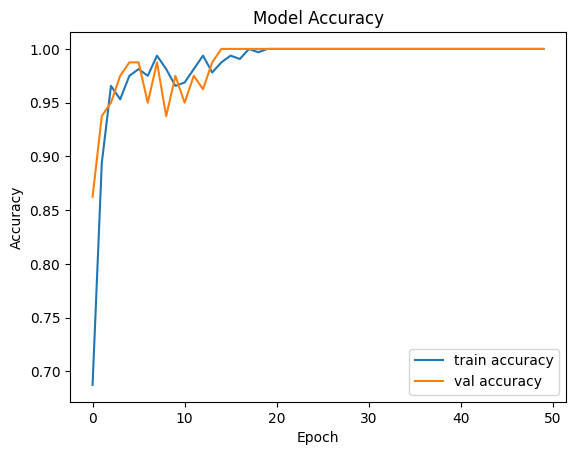

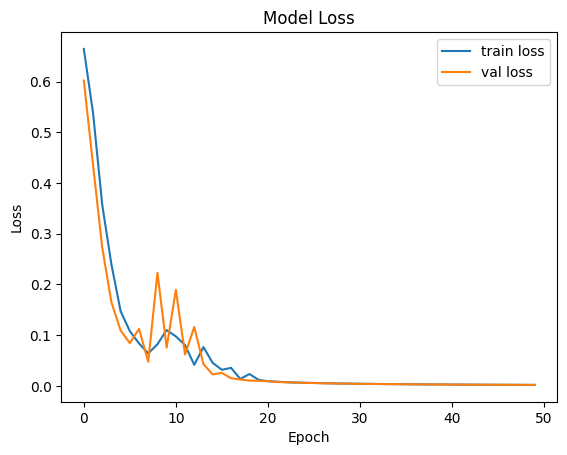

In [20]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend(loc='lower right')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend(loc='upper right')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
model.save('/content/firetruck_vs_unknown_lstm_model.h5')